[3.84227299e+04 1.32125321e+05 4.46450156e+04 3.49103277e+00
 4.65083273e+01 7.17945801e-01]


(0.0, 0.3)

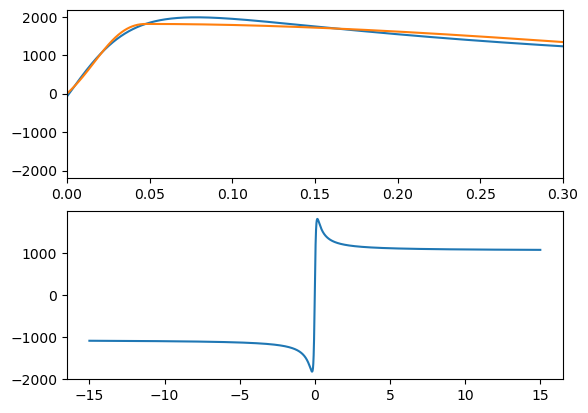

In [1]:
#TMeasy Fitting

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

#Modell importieren
import model.Pacejka52.Pacejka52 as pa52
import model.TMeasy.TMeasy as tm

#parameter importieren
import model.Parameter.Tmeasy_params as pa

#iterations
i=10000
#Variables
Fz = np.ones(5000)*1000
SL = np.linspace(-1,1,i)
alpha = np.linspace(-15,15,i)
IA = 0
Fz0 = 13000

#orginal funktion
Fx_Pa = pa52.Pacejka52_long(1000,SL,IA,Fz0)[0]
Fy_Pa = pa52.Pacejka52_lat(1000,alpha,IA,Fz0)[0]

#Plot Pacejka
fig, axs = plt.subplots(2)
axs[0].plot(SL, Fx_Pa)
axs[1].plot(alpha, Fy_Pa)

#Cut curve
cut = int(i/2)
Fx_Pa_pos = Fx_Pa[cut::]
Fy_Pa_pos = Fy_Pa[cut::]
#Fitting with curvefit
xdata = np.linspace(0,1,cut)
ydata = Fx_Pa_pos

SL_fit = xdata
alpha_fit = np.linspace(0,15,cut)

#Funktion
p=np.zeros(6)
a = tm.interp_nonlin(pa.DFX1,pa.DFX2,Fz)[0]
b = tm.interp_nonlin(pa.FMX1,pa.FMX2,Fz)[0]
c = tm.interp_nonlin(pa.FSX1,pa.FSX2,Fz)[0]
d = tm.interp_lin(pa.SMX1,pa.SMX2,Fz)[0]
e = tm.interp_lin(pa.SSX1,pa.SSX2,Fz)[0]
f = tm.interp_lin(pa.SMY1,pa.SMY2,Fz)[0]

def calcFx(a,b,c,d,e,f, FZ, SX, SY, LMU):
    d_arr = np.ones(len(SL_fit)) * d
    f_arr = np.ones(len(alpha_fit)) * f
    SIGX = SL_fit/d_arr
    SIGY = alpha_fit/f_arr

#Combined Slip
    SIG = np.sqrt(SIGX**2 + SIGY**2)

    FX = np.zeros(len(SIG))
    j =0
    for j in range(0,len(SIG)):
        if SIG[j]<=1:
            AX1 = a * d
            BX1 = d / b * a - 2
            FX[j] = AX1*SIGX[j]/(SIG[j]**2+BX1*SIG[j]+1)
        elif SIG[j] <= e/d:
            AX2 = (SIG[j]-1)/(e/d-1)
            FX[j] = SIGX[j]/SIG[j] *(b - (b-c)*AX2**2*(3-2*AX2))
        else:
            FX[j] = SIGX[j]/SIG[j] * c
    return FX


#intial guess
x0 = [30000,2000,1,1,1,1]

#Curve fitting without brake asymetrie
#Fx
def func(SL_fit, a,b,c,d,e,f):
    return calcFx(a,b,c,d,e,f,Fz,SL_fit,alpha_fit,1)



opti = op.curve_fit(func, xdata, ydata, x0,maxfev=50000)[0]
fun_fit = func(xdata,opti[0],opti[1],opti[2],opti[3],opti[4],opti[5])
print(opti)

axs[0].plot(xdata,fun_fit)
axs[0].set_xlim(0,0.3)



#Fy
#xdata_Fy = alpha_fit
#ydata_Fy = Fy_Pa_pos
#def func2(alpha_fit, a, b, c, d, e, f):
#    return tm.calcFY(a, b, c, d, e, f,10000,SL_fit,alpha_fit,1)

#opti2 = op.curve_fit(func2, xdata_Fy, ydata_Fy, x0)[0]
#fun_fit = func2(xdata_Fy,opti2[0],opti2[1],opti2[2],opti2[3],opti2[4],opti2[5])
#print(opti2)
#axs[1].plot(xdata_Fy,fun_fit)
#axs[1].set_xlim(0,0.3)

#least square
#def y(p, t):
#    return tm.calcFx1(p,10000,SL2,alpha2,1)

#def fun(ar):
#    return y(ar, x2) #- Fx_Pa

#res1 = op.least_squares(fun, x0)
#axs[3].plot(x2,y(res1.x,x2))
#axs[0].plot(np.linspace(0,1,cut),Fx_Pa_pos)

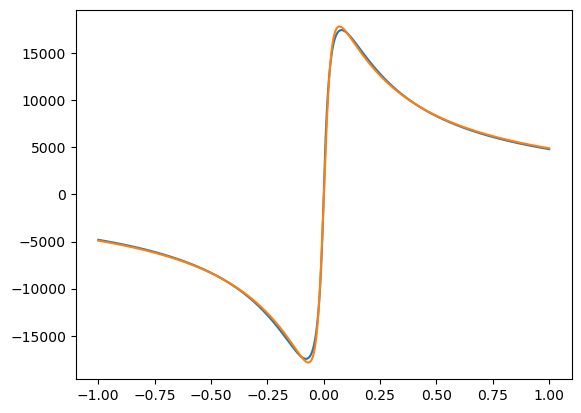

In [5]:
ful = tm.calcFx(opti[0], opti[1], opti[2], opti[3], opti[4], opti[5],10000,SL,alpha,1)
plt.plot(SL,ful)
plt.plot(SL,Fx_Pa)

[-2.15885698e+05 -2.84732449e+03  2.10326033e+03  2.37081307e+00
  1.00000000e+00 -8.45294847e+00]


(-1.0, 1.0)

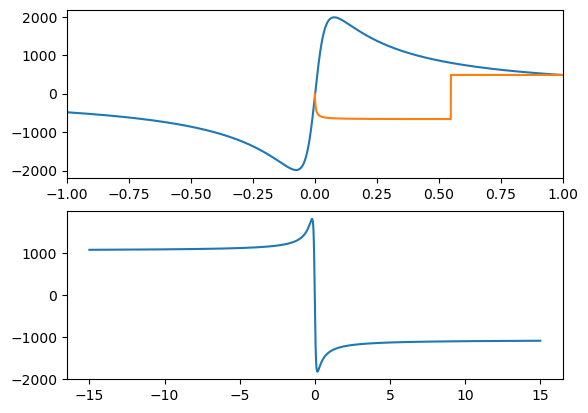

In [30]:
#TMeasy Fitting

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

#Modell importieren
import model.Pacejka52.Pacejka52 as pa52
import model.TMeasy.TMeasy as tm

#parameter importieren
import model.Parameter.Tmeasy_params as pa

#iterations
i=10000
#Variables
Fz = np.ones(i)*1000
SL = np.linspace(-1,1,i)
alpha = np.linspace(-15,15,i)
IA = 0
Fz0 = 13000

#orginal funktion
Fx_Pa = pa52.Pacejka52_long(1000,SL,IA,Fz0)[0]
Fy_Pa = pa52.Pacejka52_lat(1000,alpha,IA,Fz0)[0]

#Plot Pacejka
fig, axs = plt.subplots(2)
axs[0].plot(SL, Fx_Pa)
axs[1].plot(alpha, Fy_Pa)

#Cut curve

#Fitting with curvefit
xdata = np.linspace(0,1,i)
ydata = Fx_Pa

SL_fit = xdata
alpha_fit = np.linspace(0,15,i)

#Funktion
p=np.zeros(6)
a = tm.interp_nonlin(pa.DFX1,pa.DFX2,Fz)[0]
b = tm.interp_nonlin(pa.FMX1,pa.FMX2,Fz)[0]
c = tm.interp_nonlin(pa.FSX1,pa.FSX2,Fz)[0]
d = tm.interp_lin(pa.SMX1,pa.SMX2,Fz)[0]
e = tm.interp_lin(pa.SSX1,pa.SSX2,Fz)[0]
f = tm.interp_lin(pa.SMY1,pa.SMY2,Fz)[0]

def calcFx(a,b,c,d,e,f, FZ, SX, SY, LMU):
    d_arr = np.ones(len(SL_fit)) * d
    f_arr = np.ones(len(alpha_fit)) * f
    SIGX = SL_fit/d_arr
    SIGY = alpha_fit/f_arr

#Combined Slip
    SIG = np.sqrt(SIGX**2 + SIGY**2)

    FX = np.zeros(len(SIG))
    j =0
    for j in range(0,len(SIG)):
        if SIG[j]<=1:
            AX1 = a * d
            BX1 = d / b * a - 2
            FX[j] = AX1*SIGX[j]/(SIG[j]**2+BX1*SIG[j]+1)
        elif SIG[j] <= e/d:
            AX2 = (SIG[j]-1)/(e/d-1)
            FX[j] = SIGX[j]/SIG[j] *(b - (b-c)*AX2**2*(3-2*AX2))
        else:
            FX[j] = SIGX[j]/SIG[j] * c
    return FX


#intial guess
x0 = [30000,2000,1,1,1,1]

#Curve fitting without brake asymetrie
#Fx
def func(SL_fit, a,b,c,d,e,f):
    return calcFx(a,b,c,d,e,f,Fz,SL_fit,alpha_fit,1)



opti = op.curve_fit(func, xdata, ydata, x0,maxfev=50000)[0]
fun_fit = func(xdata,opti[0],opti[1],opti[2],opti[3],opti[4],opti[5])
print(opti)

axs[0].plot(xdata,fun_fit)
axs[0].set_xlim(-1,1)



#Fy
#xdata_Fy = alpha_fit
#ydata_Fy = Fy_Pa_pos
#def func2(alpha_fit, a, b, c, d, e, f):
#    return tm.calcFY(a, b, c, d, e, f,10000,SL_fit,alpha_fit,1)

#opti2 = op.curve_fit(func2, xdata_Fy, ydata_Fy, x0)[0]
#fun_fit = func2(xdata_Fy,opti2[0],opti2[1],opti2[2],opti2[3],opti2[4],opti2[5])
#print(opti2)
#axs[1].plot(xdata_Fy,fun_fit)
#axs[1].set_xlim(0,0.3)

#least square
#def y(p, t):
#    return tm.calcFx1(p,10000,SL2,alpha2,1)

#def fun(ar):
#    return y(ar, x2) #- Fx_Pa

#res1 = op.least_squares(fun, x0)
#axs[3].plot(x2,y(res1.x,x2))
#axs[0].plot(np.linspace(0,1,cut),Fx_Pa_pos)

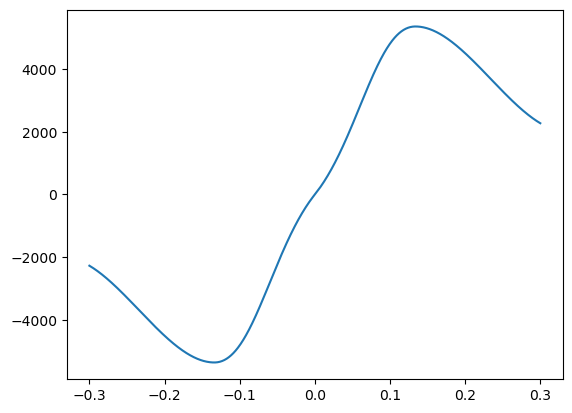

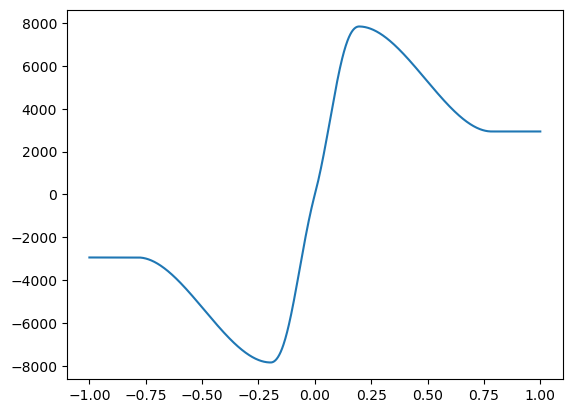

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import TMeasy_model_Paco as tmpa
SX = np.linspace(-1,1,1000)
SY = np.linspace(-0.3,0.3,1000)

Fy = tmpa.calcFY(SX,SY, 30000, 8000, 3000, 0.2, 0.5,0.6 )
Fx = tmpa.calcFx(SX,SY,40000, 8000, 3000, 0.2, 0.8,0.3 )

plt.figure(1)
plt.plot(SY,Fy)

plt.figure(2)
plt.plot(SX,Fx)
